<a href="https://colab.research.google.com/github/luispmorera/TP_Morera_Luis_Data_Science/blob/main/PROYECTO_FINAL_CH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree


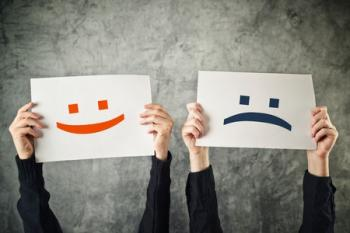



Contenido
Las puntuaciones y clasificaciones de la felicidad utilizan datos de la Encuesta Mundial de Gallup. Las columnas que siguen a la estimación de la puntuación de la felicidad indican hasta qué punto cada uno de seis factores – producción económica, apoyo social, esperanza de vida, libertad, ausencia de corrupción y generosidad – contribuyen a hacer que las evaluaciones de vida sean más altas en cada país que en Distopía, un país hipotético que tiene valores iguales a los promedios nacionales más bajos del mundo para cada uno de los seis factores. Estos factores no tienen impacto en la puntuación total reportada para cada país, pero sí explican por qué algunos países se clasifican más alto que otros.

En este trabajo trataré de explorar y comprender cuáles son las variables que mas peso tienen en la percepción de bienestar subjetivo (felicidad).

Contexto:
El informe de felicidad mundial es una investigación global que evalúa el bienestar subjetivo y otros factores socioeconómicos que influyen en la felicidad de los individuos en diferentes países. Los datos incluyen una variedad de indicadores como el PIB per cápita, la esperanza de vida saludable, el apoyo social, la libertad para tomar decisiones, la generosidad, la percepción de corrupción, y los afectos positivos y negativos.

Audiencia:

Investigadores y académicos: Interesados en estudiar las correlaciones y causaciones entre diversos factores económicos, sociales y de salud con la felicidad.
Políticos y legisladores: Buscan datos y análisis para diseñar políticas que mejoren la calidad de vida y el bienestar de sus ciudadanos.
Organizaciones no gubernamentales (ONGs) y agencias internacionales: Utilizan estos datos para focalizar sus programas y esfuerzos en áreas que necesitan mejora.
Empresas y economistas: Analizan cómo factores de bienestar pueden influir en la productividad y el desarrollo económico.
Ciudadanos interesados: Personas que desean entender qué factores influyen en la felicidad y el bienestar en su país y en otros.

Hipótesis y Preguntas de Interés

Hipótesis:

Hipótesis 1: Existe una correlación significativa entre el PIB per cápita y el nivel de felicidad de los países.
Hipótesis 2: La percepción de corrupción tiene un impacto negativo significativo en el bienestar subjetivo de los individuos.
Hipótesis 3: El apoyo social y la libertad para tomar decisiones son factores determinantes más importantes para la felicidad que los ingresos económicos.

Preguntas de Interés:

¿Qué factores económicos y sociales tienen la mayor influencia en la felicidad de los países?
¿Cómo varía la percepción de felicidad entre países con diferentes niveles de desarrollo económico?
¿Qué rol juegan el apoyo social y la libertad personal en la felicidad subjetiva de los individuos?
¿Existe una relación entre la percepción de corrupción y los niveles de felicidad en diferentes países?
¿Hay diferencias significativas en los índices de felicidad entre diferentes continentes o regiones?

Posibles Limitaciones

Datos Faltantes o Incompletos: Algunos países pueden tener datos incompletos o faltantes para ciertos años o indicadores, lo que puede afectar la robustez del análisis.
Sesgo en la Encuesta: Las respuestas de los encuestados pueden estar sujetas a sesgos culturales o personales, lo que puede influir en la precisión de las medidas de felicidad subjetiva.
Medición de Variables: Las diferencias en la metodología de recolección de datos entre diferentes fuentes (Gallup World Poll, Banco Mundial, OMS) pueden llevar a inconsistencias.
Causalidad vs. Correlación: Identificar relaciones causales directas entre variables puede ser desafiante; la correlación entre variables no implica necesariamente causalidad.
Cambio en Indicadores: Los indicadores y las preguntas de encuesta pueden haber cambiado ligeramente a lo largo de los años, lo que podría afectar la comparabilidad temporal de los datos.
Representatividad de la Muestra: La representatividad de la muestra puede variar entre países, especialmente en aquellos con conflictos o inestabilidad política.
Influencias Externas: Factores externos no considerados en el análisis (como eventos globales, pandemias, desastres naturales) pueden influir en los niveles de felicidad y no estar reflejados en los datos.

In [23]:
df=pd.read_csv("/content/drive/MyDrive/world-happiness-report-2021.csv")


In [24]:
df.head()


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


INFORMACIÓN BÁSICA ACERCA DEL DATAFRAME

Fuentes de datos y definiciones de variables:

-Puntuación de felicidad o bienestar subjetivo (nombre de la variable: ladder):

La medida de bienestar subjetivo proviene de la Encuesta Mundial de Gallup (GWP) publicada el 26 de febrero de 2021, cubriendo los años 2005 a 2020.
Se basa en la respuesta promedio nacional a la pregunta de evaluaciones de vida: "Por favor, imagine una escalera con peldaños numerados del 0 en la parte inferior al 10 en la parte superior. La parte superior de la escalera representa la mejor vida posible para usted y la parte inferior representa la peor vida posible. ¿En qué peldaño de la escalera diría que se encuentra en este momento?"
También se conoce como la "escalera de la vida de Cantril".

-PIB per cápita (nombre de la variable: gdp):

Basado en la paridad de poder adquisitivo (PPA) a precios constantes de 2017 dólares internacionales, según la actualización del 14 de octubre de 2020 de los Indicadores de Desarrollo Mundial (WDI).

-Esperanza de vida saludable (HLE):

Basada en datos de la Organización Mundial de la Salud (OMS) del repositorio de datos del Observatorio Mundial de la Salud, actualizados el 28 de septiembre de 2020.
Incluye datos para los años 2000, 2005, 2010, 2015 y 2016, interpolados y extrapolados para el período de la muestra (2005-2020).

-Apoyo social:

Promedio nacional de respuestas binarias (0 o 1) a la pregunta: "Si tuviera problemas, ¿tiene familiares o amigos en quienes pueda confiar para que le ayuden cuando los necesite?"

-Libertad para tomar decisiones de vida:

Promedio nacional de respuestas a la pregunta: "¿Está satisfecho o insatisfecho con su libertad para elegir lo que hace con su vida?"

-Generosidad:

Residual de la regresión del promedio nacional de respuestas a la pregunta: "¿Ha donado dinero a una organización benéfica en el último mes?" en el PIB per cápita.

-Percepción de corrupción:

Promedio nacional de respuestas a dos preguntas: "¿Es la corrupción generalizada en el gobierno?" y "¿Es la corrupción generalizada en las empresas?".
Se usa la percepción de corrupción en empresas si falta la de gobierno.

-Índice de Gini del ingreso de los hogares:

Basado en los datos de la Encuesta Mundial de Gallup y el Banco Mundial, el índice de Gini mide la desigualdad de ingresos dentro de un país.
Estas variables se utilizan para analizar y comparar el bienestar subjetivo y otros factores que influyen en la felicidad a nivel nacional.




In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [26]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.43,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.00,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.43,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.43,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.43,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


LIMPIEZA DE DATOS

In [27]:
raw_data = df.copy() # Punto de control


In [28]:
# Valores omitidos

null_count = df.isnull().sum().sort_values(ascending=False)
null_percent = null_count/len(df.index)*100
null_summary = pd.concat([null_count, null_percent], axis = 1, keys = ["Conteo", "Porcentaje"])
print("Cantidad de valores perdidos y porcentaje: ")
print(null_summary)

Cantidad de valores perdidos y porcentaje: 
                                            Conteo  Porcentaje
Country name                                     0         0.0
Regional indicator                               0         0.0
Explained by: Perceptions of corruption          0         0.0
Explained by: Generosity                         0         0.0
Explained by: Freedom to make life choices       0         0.0
Explained by: Healthy life expectancy            0         0.0
Explained by: Social support                     0         0.0
Explained by: Log GDP per capita                 0         0.0
Ladder score in Dystopia                         0         0.0
Perceptions of corruption                        0         0.0
Generosity                                       0         0.0
Freedom to make life choices                     0         0.0
Healthy life expectancy                          0         0.0
Social support                                   0         0.0
Logged GDP 

In [29]:
print(df.isnull().sum())
#me aseguro de no tener datos perdidos


Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64


In [30]:
for col in df.columns:
    print(col, end= ': ')
    print(df[col].unique())
    #no se observan valores atípicos para ninguna de las variables todos los datos se encuentran en rangos esperables

Country name: ['Finland' 'Denmark' 'Switzerland' 'Iceland' 'Netherlands' 'Norway'
 'Sweden' 'Luxembourg' 'New Zealand' 'Austria' 'Australia' 'Israel'
 'Germany' 'Canada' 'Ireland' 'Costa Rica' 'United Kingdom'
 'Czech Republic' 'United States' 'Belgium' 'France' 'Bahrain' 'Malta'
 'Taiwan Province of China' 'United Arab Emirates' 'Saudi Arabia' 'Spain'
 'Italy' 'Slovenia' 'Guatemala' 'Uruguay' 'Singapore' 'Kosovo' 'Slovakia'
 'Brazil' 'Mexico' 'Jamaica' 'Lithuania' 'Cyprus' 'Estonia' 'Panama'
 'Uzbekistan' 'Chile' 'Poland' 'Kazakhstan' 'Romania' 'Kuwait' 'Serbia'
 'El Salvador' 'Mauritius' 'Latvia' 'Colombia' 'Hungary' 'Thailand'
 'Nicaragua' 'Japan' 'Argentina' 'Portugal' 'Honduras' 'Croatia'
 'Philippines' 'South Korea' 'Peru' 'Bosnia and Herzegovina' 'Moldova'
 'Ecuador' 'Kyrgyzstan' 'Greece' 'Bolivia' 'Mongolia' 'Paraguay'
 'Montenegro' 'Dominican Republic' 'North Cyprus' 'Belarus' 'Russia'
 'Hong Kong S.A.R. of China' 'Tajikistan' 'Vietnam' 'Libya' 'Malaysia'
 'Indonesia' 'Congo (

ANALISIS EXPLORATORIO DE DATOS (EDA)

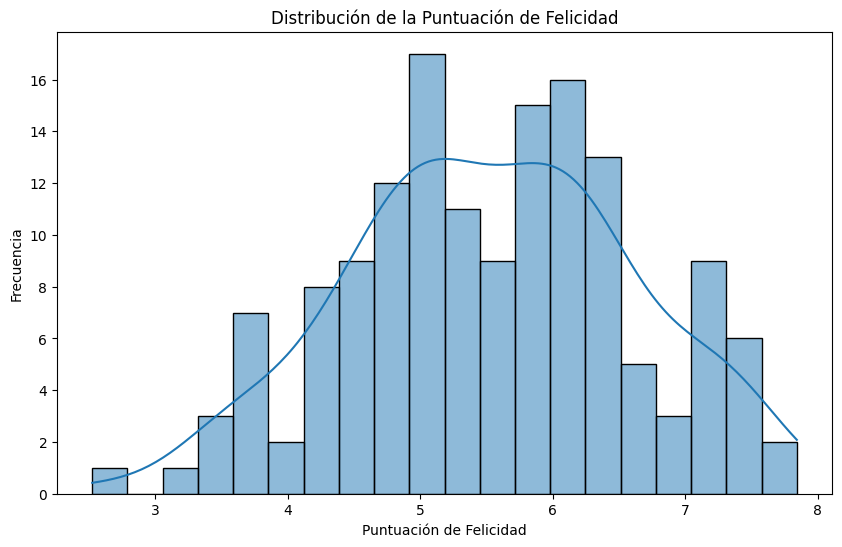

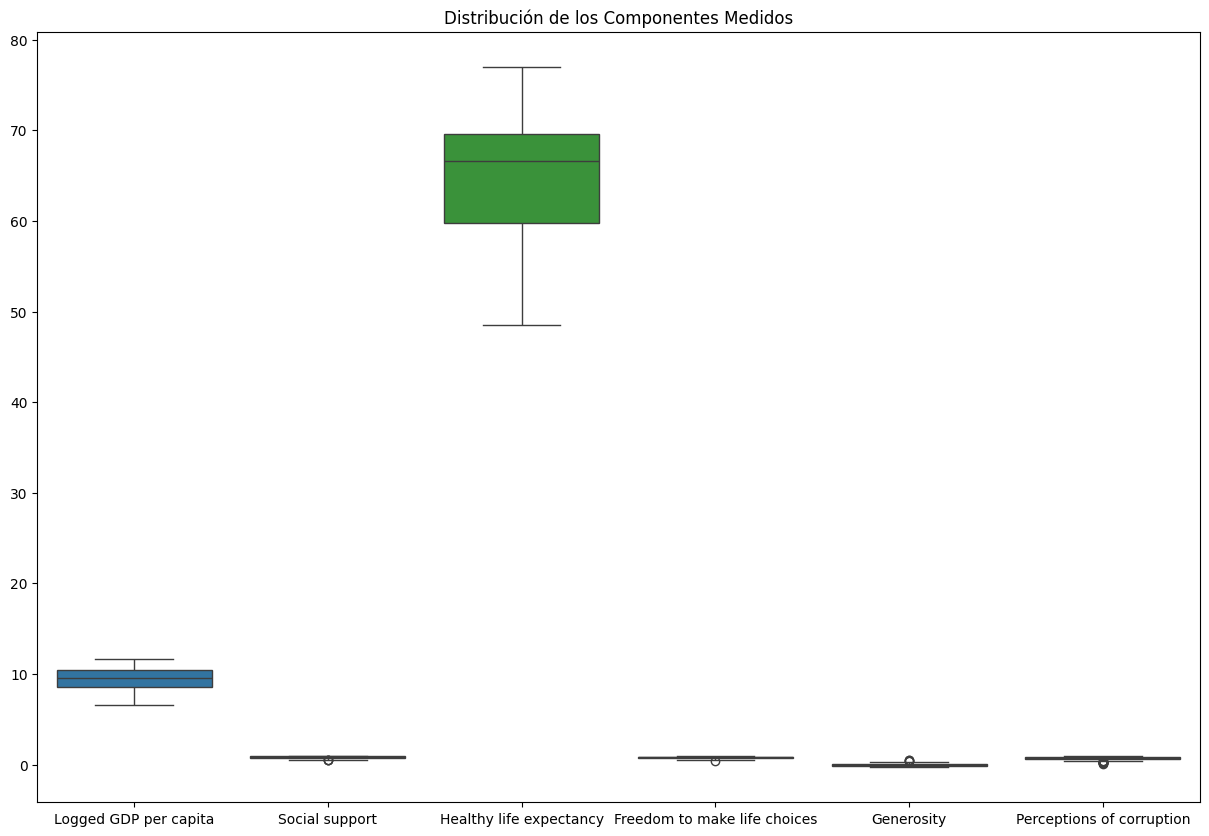

In [31]:

# Histograma de la puntuación de felicidad
plt.figure(figsize=(10, 6))
sns.histplot(df['Ladder score'], bins=20, kde=True)
plt.title('Distribución de la Puntuación de Felicidad')
plt.xlabel('Puntuación de Felicidad')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de los componentes medidos
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
                     'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']])
plt.title('Distribución de los Componentes Medidos')
plt.show()


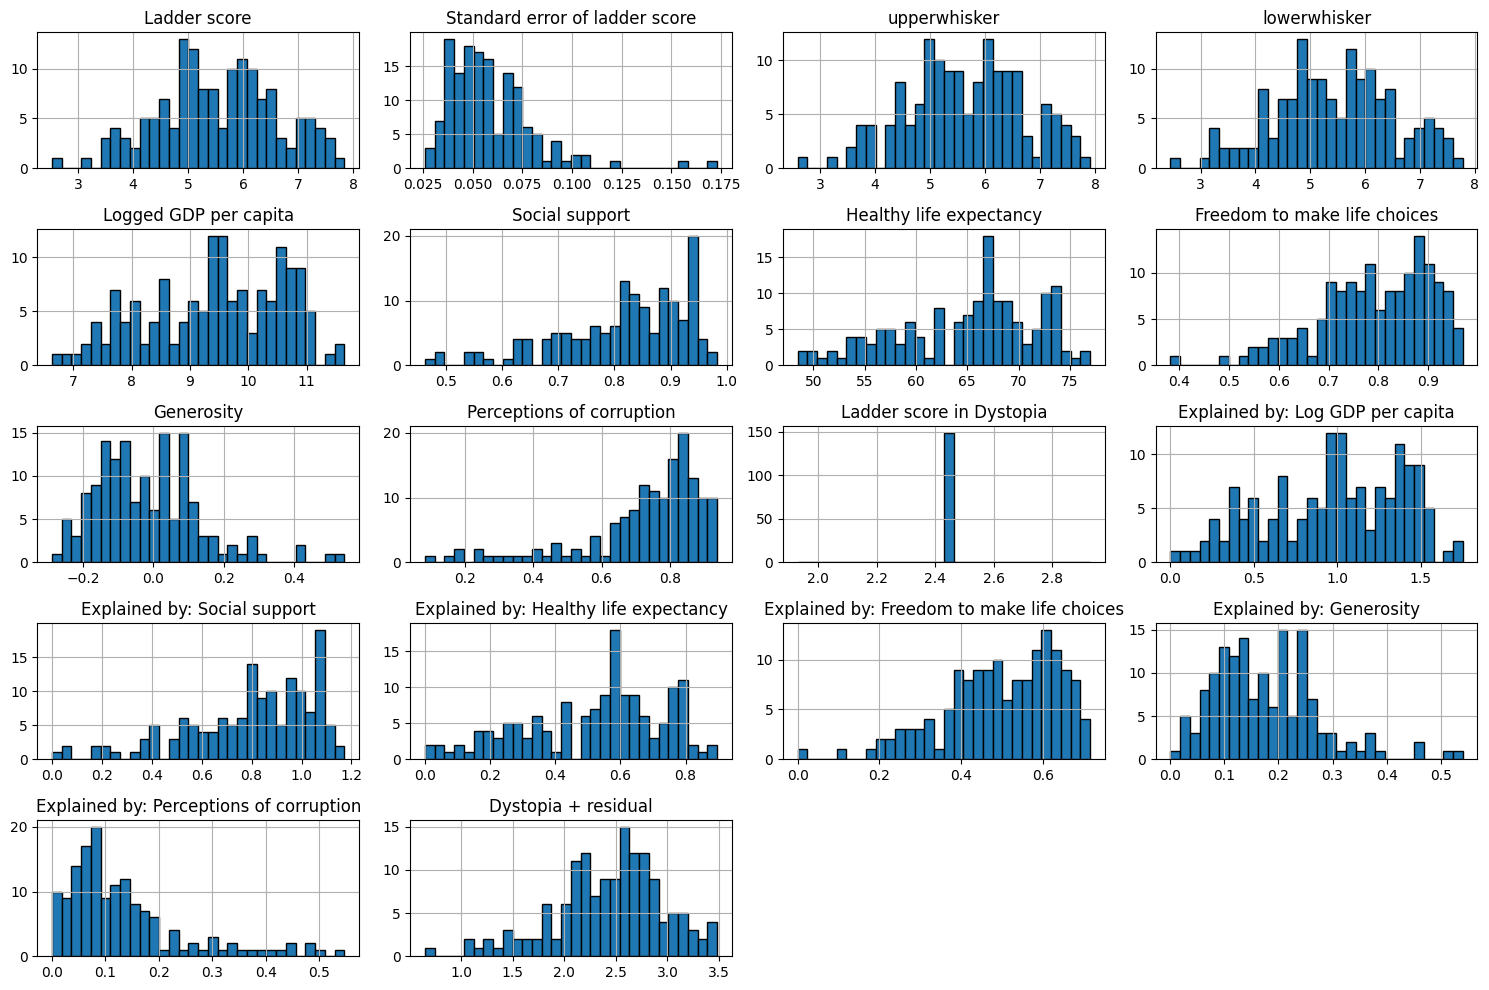

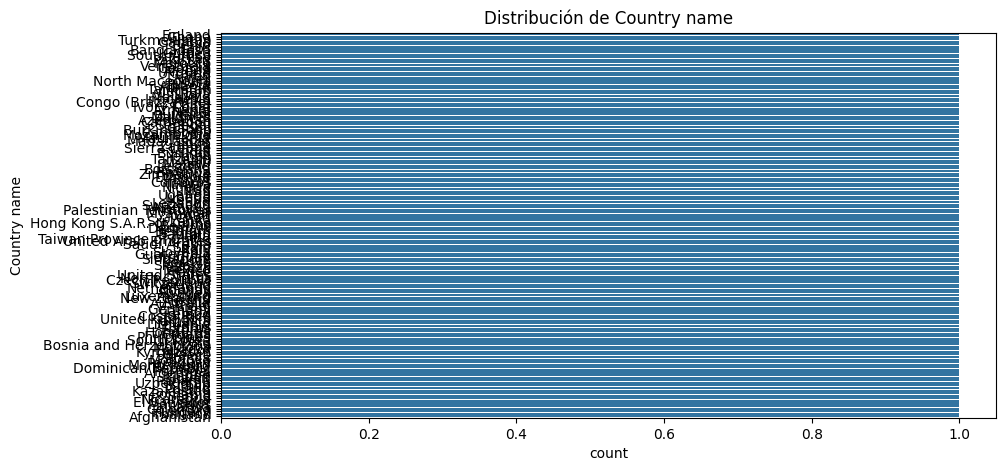

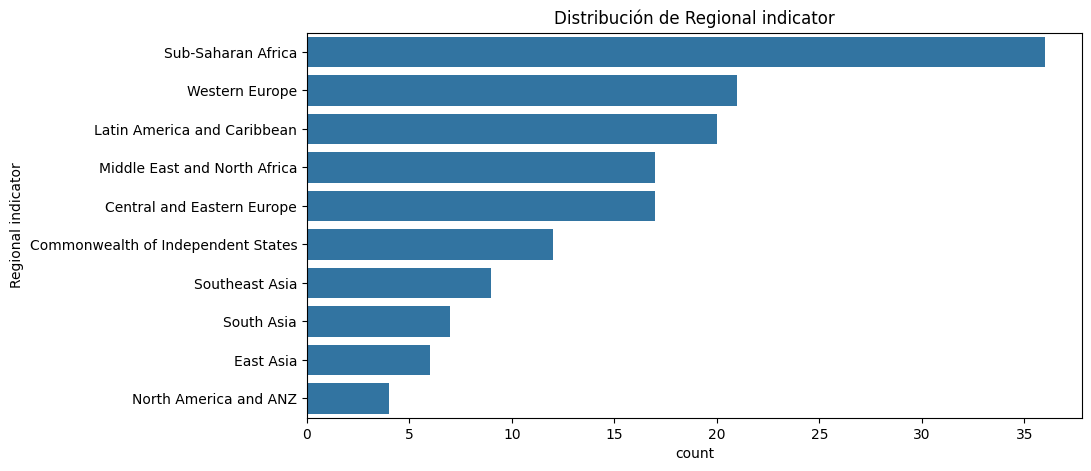

In [32]:
# Distribución de variables numéricas
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

# Distribución de variables categóricas
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribución de {column}')
    plt.show()


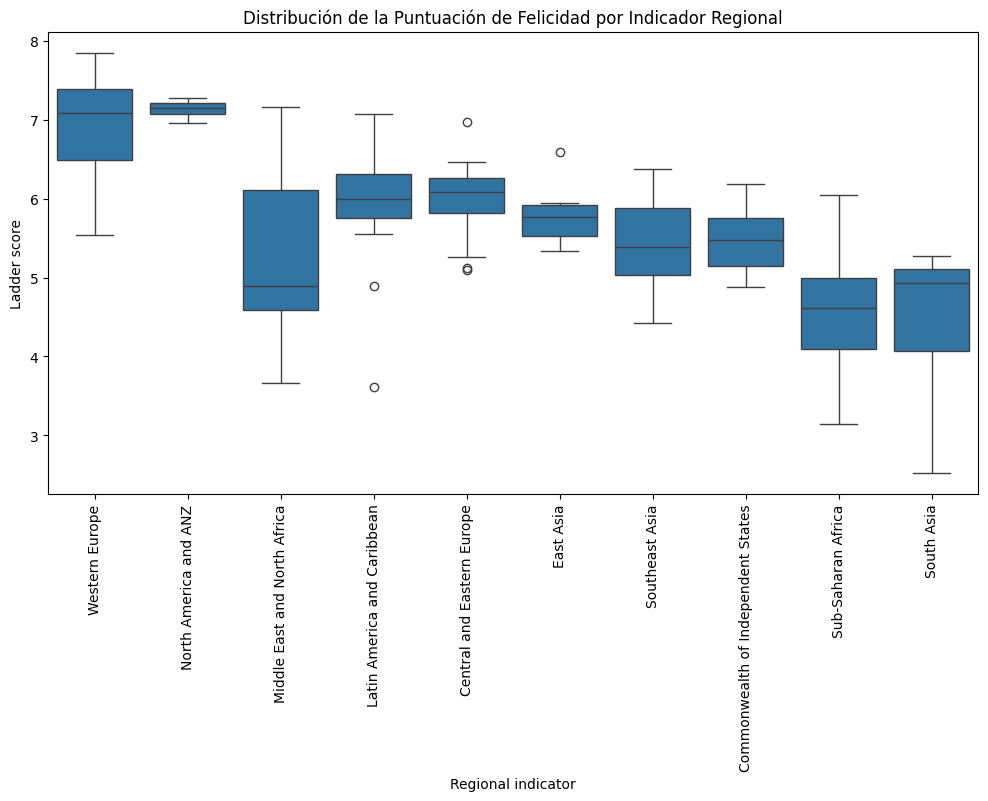

In [33]:
# Boxplot de la puntuación de felicidad por indicador regional
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Regional indicator', y='Ladder score')
plt.title('Distribución de la Puntuación de Felicidad por Indicador Regional')
plt.xticks(rotation=90)
plt.show()


In [36]:
# Calcular los cuartiles
quartiles = df['Ladder score'].quantile([0.25, 0.5, 0.75])

print(quartiles)


0.25    4.852
0.50    5.534
0.75    6.255
Name: Ladder score, dtype: float64


In [37]:
# Función para clasificar los países en cuartiles
def classify_quartile(score, quartiles):
    if score <= quartiles[0.25]:
        return 'Q1 (Least Happy)'
    elif score <= quartiles[0.5]:
        return 'Q2'
    elif score <= quartiles[0.75]:
        return 'Q3'
    else:
        return 'Q4 (Most Happy)'

# Aplicar la función a cada puntuación de felicidad
df['Quartile'] = df['Ladder score'].apply(lambda x: classify_quartile(x, quartiles))

# Mostrar las primeras filas del DataFrame actualizado
df.head()


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Quartile
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,Q4 (Most Happy)
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,Q4 (Most Happy)
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,Q4 (Most Happy)
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,Q4 (Most Happy)
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,Q4 (Most Happy)


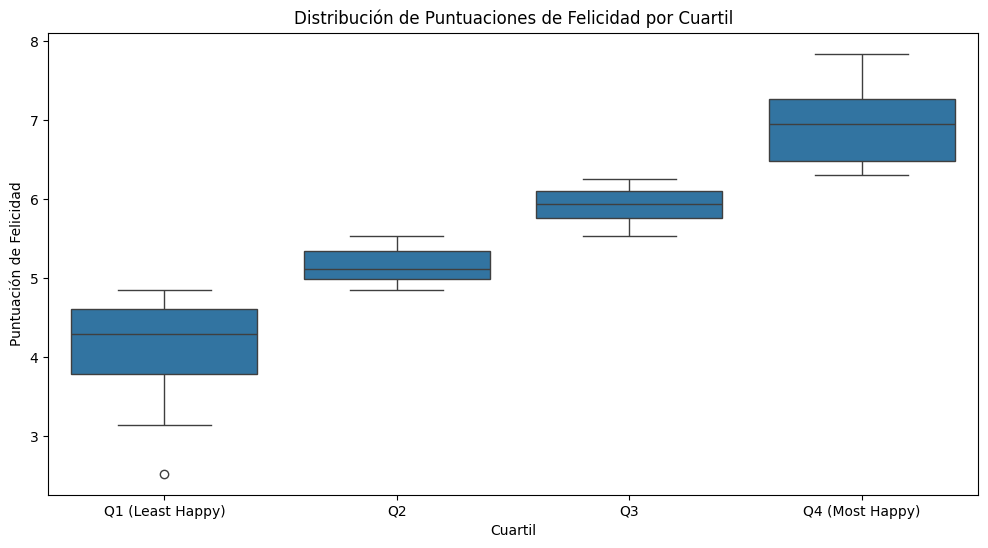

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot de puntuaciones de felicidad por cuartil
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Quartile', y='Ladder score', order=['Q1 (Least Happy)', 'Q2', 'Q3', 'Q4 (Most Happy)'])
plt.title('Distribución de Puntuaciones de Felicidad por Cuartil')
plt.xlabel('Cuartil')
plt.ylabel('Puntuación de Felicidad')
plt.show()


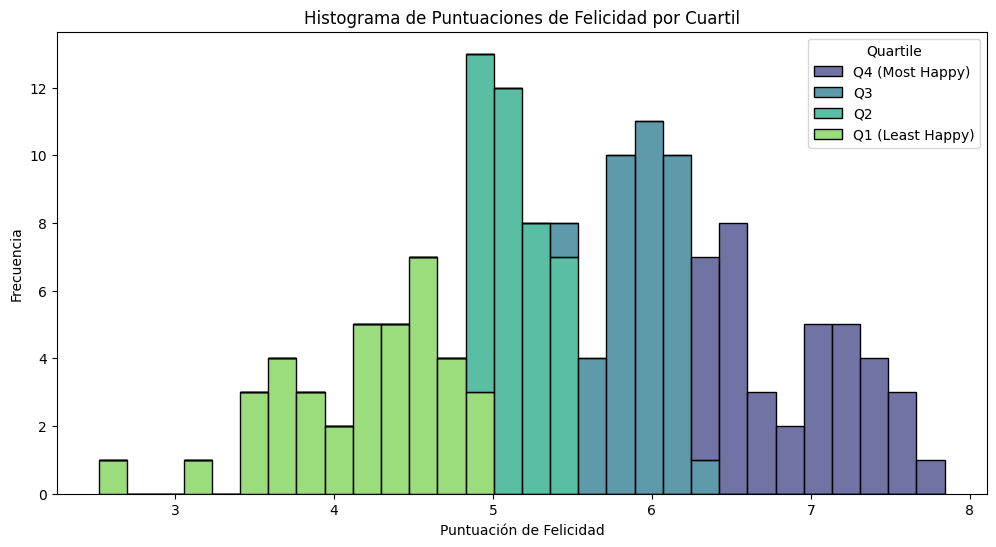

In [39]:
# Histograma de puntuaciones de felicidad por cuartil
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Ladder score', hue='Quartile', multiple='stack', bins=30, palette='viridis')
plt.title('Histograma de Puntuaciones de Felicidad por Cuartil')
plt.xlabel('Puntuación de Felicidad')
plt.ylabel('Frecuencia')
plt.show()


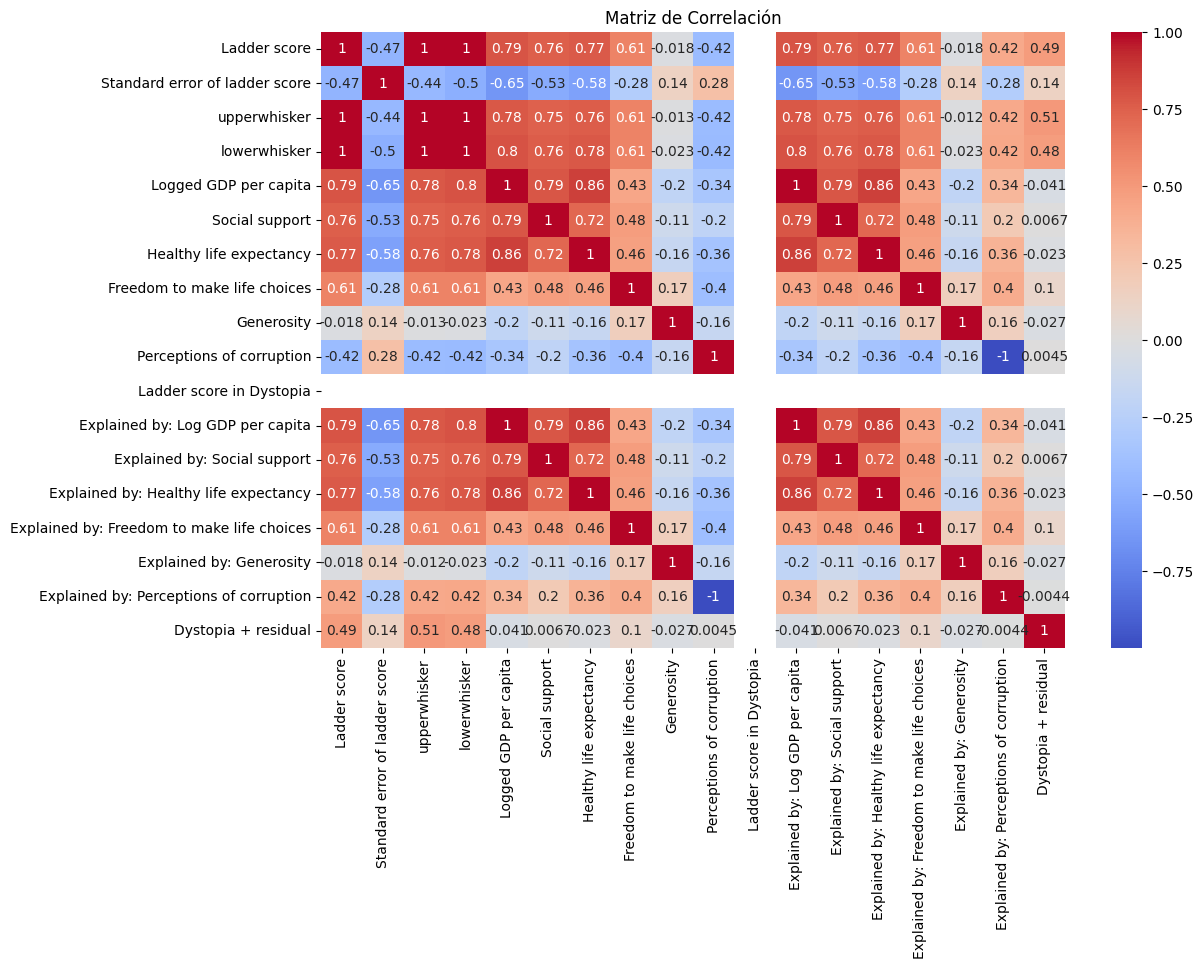

In [40]:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Matriz de correlación
correlation_matrix = numeric_df.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


In [77]:
import statsmodels.api as sm

# Verificar los tipos de datos
print(df.dtypes)

# Seleccionar las columnas numéricas para el modelado
X = df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
        'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = df['Ladder score']

# Comprobar si hay valores nulos
print(X.isnull().sum())
print(y.isnull().sum())

# Eliminar filas con valores nulos si es necesario
X = X.dropna()
y = y.dropna()

# Añadir una constante (intercepto) al modelo
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())


Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

In [76]:
from sklearn.linear_model import LinearRegression

# Ajustar el modelo de regresión lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Coeficientes de regresión lineal
linear_coef = lr_model.coef_

# Crear un DataFrame para mostrar los coeficientes
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_coef
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)


                        Feature  Coefficient
1                Social support     2.596022
3  Freedom to make life choices     1.658139
4                    Generosity     0.415580
0         Logged GDP per capita     0.267994
2       Healthy life expectancy     0.037221
5     Perceptions of corruption    -0.772454


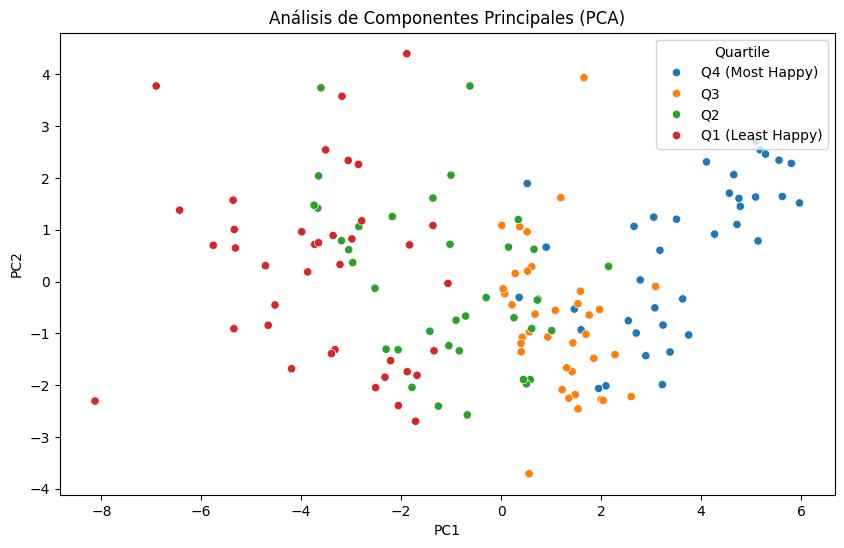

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))

# Realizar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Convertir a DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Añadir las etiquetas de cuartiles
pca_df['Quartile'] = df['Quartile']

# Visualizar los componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Quartile', data=pca_df)
plt.title('Análisis de Componentes Principales (PCA)')
plt.show()



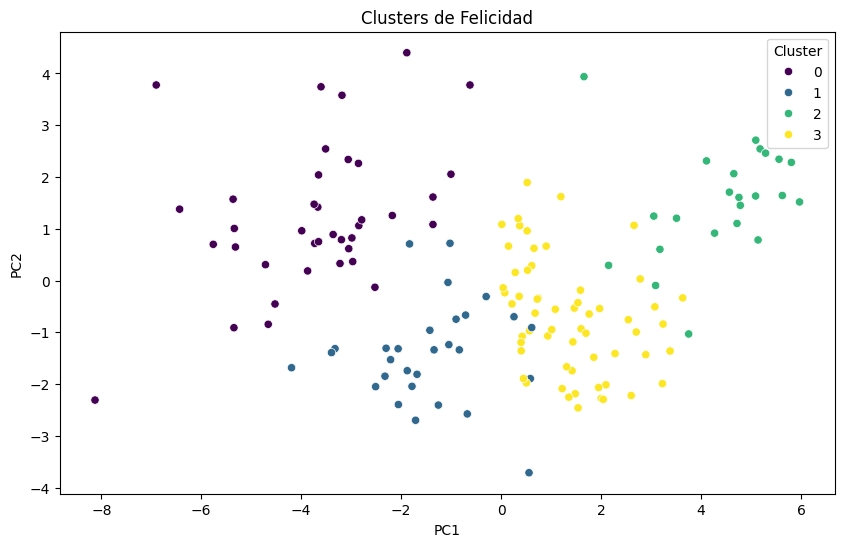

In [43]:
from sklearn.cluster import KMeans

# Realizar K-means
kmeans = KMeans(n_clusters=4, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

# Añadir las etiquetas de clusters al DataFrame original
df['Cluster'] = clusters

# Añadir las etiquetas de clusters al DataFrame de PCA
pca_df['Cluster'] = clusters

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Clusters de Felicidad')
plt.show()



In [44]:
import pandas as pd

# Crear un DataFrame con las cargas de los componentes principales
pca_loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=df.select_dtypes(include=['float64', 'int64']).columns)

print(pca_loadings)


                                                 PC1       PC2
Ladder score                                0.310066  0.052284
Standard error of ladder score             -0.208162  0.123020
upperwhisker                                0.307309  0.058227
lowerwhisker                                0.312324  0.046482
Logged GDP per capita                       0.300819 -0.145326
Social support                              0.282313 -0.112846
Healthy life expectancy                     0.295221 -0.107564
Freedom to make life choices                0.219521  0.263584
Generosity                                 -0.028169  0.523182
Perceptions of corruption                  -0.162683 -0.310375
Ladder score in Dystopia                   -0.000000 -0.000000
Explained by: Log GDP per capita            0.300815 -0.145302
Explained by: Social support                0.282315 -0.112740
Explained by: Healthy life expectancy       0.295225 -0.107635
Explained by: Freedom to make life choices  0.219517  0

In [48]:
# Obtener solo las columnas numéricas
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Agrupar solo por columnas numéricas
cluster_stats = df.groupby('cluster')[numerical_columns].mean()
print(cluster_stats)



         Ladder score  Standard error of ladder score  upperwhisker  \
cluster                                                               
0            4.451553                        0.077421      4.603395   
1            4.761793                        0.058724      4.876862   
2            7.012652                        0.040913      7.092652   
3            6.031373                        0.053695      6.136678   

         lowerwhisker  Logged GDP per capita  Social support  \
cluster                                                        
0            4.299789               7.917395        0.670763   
1            4.646586               9.324483        0.786000   
2            6.932478              10.849391        0.928261   
3            5.926051               9.908339        0.877356   

         Healthy life expectancy  Freedom to make life choices  Generosity  \
cluster                                                                      
0                      56.277842

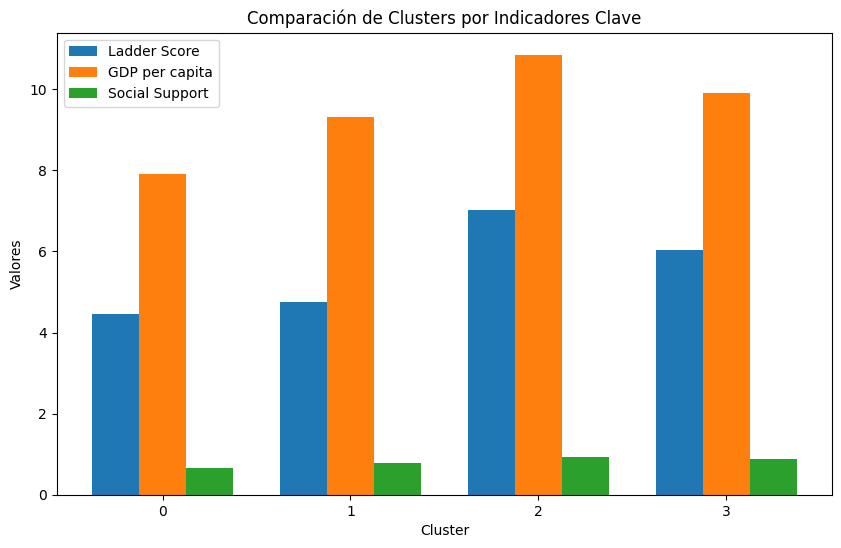

In [49]:
import matplotlib.pyplot as plt
import numpy as np

clusters = [0, 1, 2, 3]
ladder_scores = [4.451553, 4.761793, 7.012652, 6.031373]
gdp = [7.917395, 9.324483, 10.849391, 9.908339]
social_support = [0.670763, 0.786000, 0.928261, 0.877356]

x = np.arange(len(clusters))  # la posición de los clusters
width = 0.25  # el ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, ladder_scores, width, label='Ladder Score')
bars2 = ax.bar(x, gdp, width, label='GDP per capita')
bars3 = ax.bar(x + width, social_support, width, label='Social Support')

# Añadiendo etiquetas y título
ax.set_xlabel('Cluster')
ax.set_ylabel('Valores')
ax.set_title('Comparación de Clusters por Indicadores Clave')
ax.set_xticks(x)
ax.set_xticklabels(clusters)
ax.legend()

plt.show()


Conclusiones del Trabajo
1. Impacto de las Variables en la Felicidad

Los resultados del análisis de regresión OLS indican que las variables Logged GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, y Perceptions of corruption tienen un impacto significativo en el puntaje de felicidad (Ladder score). Esto confirma varias hipótesis sobre los factores que influyen en el bienestar subjetivo:

PIB per Cápita (Logged GDP per capita): Cada incremento en el PIB per cápita logarítmico está asociado con un aumento en el puntaje de felicidad. Este resultado es consistente con la hipótesis de que una mayor riqueza económica contribuye positivamente al bienestar general.

Apoyo Social (Social support): La variable de apoyo social muestra un efecto positivo significativo en el puntaje de felicidad. Esto refuerza la hipótesis de que tener redes de apoyo es crucial para el bienestar, sugiriendo que el soporte social puede actuar como un buffer frente a las adversidades.

Esperanza de Vida Saludable (Healthy life expectancy): Aunque el efecto es positivo, es relativamente pequeño en comparación con el apoyo social y el PIB. Esto sugiere que, aunque la salud es importante, su impacto sobre la felicidad puede ser menor cuando se compara con otros factores como el apoyo social.

Libertad para Tomar Decisiones de Vida (Freedom to make life choices): La libertad de tomar decisiones está positivamente relacionada con la felicidad, lo cual respalda la hipótesis de que la autonomía y el control sobre la vida personal contribuyen significativamente al bienestar.

Percepción de Corrupción (Perceptions of corruption): Un aumento en la percepción de corrupción se asocia con una disminución en el puntaje de felicidad. Este hallazgo es coherente con la idea de que la corrupción y la falta de transparencia en el gobierno afectan negativamente la percepción de bienestar de los ciudadanos.

Generosidad (Generosity): La generosidad no mostró un efecto significativo en el puntaje de felicidad en este análisis. Esto podría indicar que la generosidad, aunque valiosa, no tiene un impacto tan fuerte como las otras variables en el bienestar general.

2. Relevancia de las Componentes Principales

El análisis de Componentes Principales (PCA) revela que las principales variables que explican la variabilidad en los datos de felicidad son las mismas que las que muestran un impacto significativo en el análisis de regresión. Esto valida la elección de las variables y su relevancia para el modelo de felicidad.

3. Limitaciones y Consideraciones

Multicolinealidad: La presencia de un alto número de condición en el modelo sugiere que puede haber multicolinealidad entre las variables independientes. Esto puede afectar la precisión de los coeficientes estimados y la interpretación de su impacto individual.

Datos Agregados: Los datos provienen de encuestas nacionales y pueden no capturar variaciones a nivel individual o local que podrían influir en el bienestar subjetivo. Además, los datos de ciertas variables, como la esperanza de vida saludable, se interpolaron para ajustar el período de análisis, lo que introduce una posible imprecisión.

Generosidad y Otros Factores: La falta de significancia en la variable de generosidad sugiere que podrían existir otros factores no incluidos en el análisis que también afectan la felicidad. Futuras investigaciones podrían explorar estos factores adicionales.

4. Implicaciones Prácticas

Los resultados sugieren que las políticas destinadas a mejorar el PIB per cápita, el apoyo social, la esperanza de vida saludable, la libertad de tomar decisiones y la reducción de la corrupción podrían tener un impacto positivo en la felicidad de los ciudadanos. Específicamente, fortalecer las redes de apoyo social y garantizar una mayor transparencia en el gobierno pueden ser estrategias efectivas para mejorar el bienestar general.

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Escalar datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean[['Logged GDP per capita', 'Social support', 'Healthy life expectancy']])


In [54]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajusta eps y min_samples según sea necesario
clusters_dbscan = dbscan.fit_predict(scaled_data)

# Añadir resultados al DataFrame
df_clean['DBSCAN Cluster'] = clusters_dbscan


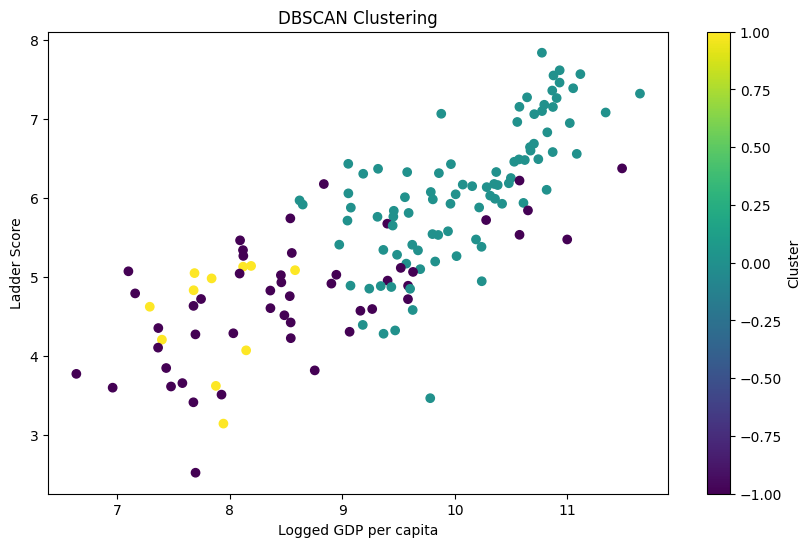

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Logged GDP per capita'], df_clean['Ladder score'], c=df_clean['DBSCAN Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Logged GDP per capita')
plt.ylabel('Ladder Score')
plt.colorbar(label='Cluster')
plt.show()


In [57]:
# Ejemplo de código para contar el número de puntos en cada cluster
cluster_summary = df_clean['DBSCAN Cluster'].value_counts()
print(cluster_summary)

# Ver los datos relevantes
print(df_clean[[ 'Logged GDP per capita', 'Social support', 'DBSCAN Cluster']].head())


DBSCAN Cluster
 0    89
-1    49
 1    11
Name: count, dtype: int64
   Logged GDP per capita  Social support  DBSCAN Cluster
0                 10.775           0.954               0
1                 10.933           0.954               0
2                 11.117           0.942               0
3                 10.878           0.983               0
4                 10.932           0.942               0


Resumen de Clusters DBSCAN

Cluster 0: 89 países

Cluster -1 (ruido): 49 países

Cluster 1: 11 países


Análisis de Clusters

Cluster 0 (89 países)
Características Comunes: Este grupo probablemente incluye países con un Logged GDP per capita y Social support relativamente altos, dado que la mayoría de los países en el cluster son significativos en términos de bienestar.
Interpretación: La gran cantidad de países en este cluster indica que hay un grupo importante que comparte características similares en términos de economía y apoyo social. Este grupo puede representar países que tienen políticas sociales efectivas y un nivel de desarrollo económico que contribuye a la felicidad.

Cluster -1 (49 países)

Ruido: Este grupo representa los países que no se agrupan en ninguno de los clusters significativos, lo que sugiere que pueden tener características atípicas o que no se alinean con los demás países en términos de Logged GDP per capita y Social support.
Interpretación: El ruido puede incluir países con situaciones económicas inusuales o con bajos niveles de apoyo social, lo que podría ser importante para investigaciones futuras sobre por qué estos países no encajan en los patrones generales.

Cluster 1 (11 países)

Características Comunes: Este pequeño grupo puede incluir países con niveles extremadamente altos de Logged GDP per capita y Social support, lo que indica que son ejemplos excepcionales de felicidad y bienestar.
Interpretación: La baja cantidad de países en este cluster sugiere que estos son modelos a seguir en términos de desarrollo y políticas sociales. Sería interesante explorar qué políticas han implementado y qué los distingue de otros países.
Conclusiones Generales
Patrones de Bienestar: Los resultados sugieren que hay una relación significativa entre el Logged GDP per capita y el Social support, con la mayoría de los países que tienen altos niveles de ambos agrupados juntos. Esto podría indicar que mejorar el apoyo social puede ser una vía efectiva para aumentar la felicidad en los países en desarrollo.

Políticas Sociales: Los países en el Cluster 0 probablemente implementan políticas sociales efectivas que contribuyen a un mayor bienestar, mientras que los que se encuentran en el Cluster -1 pueden necesitar revisar sus políticas para abordar problemas de corrupción, salud o ingresos.



In [58]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Calcular la matriz de distancias
linked = linkage(scaled_data, 'ward')  # 'ward' es uno de los métodos comunes


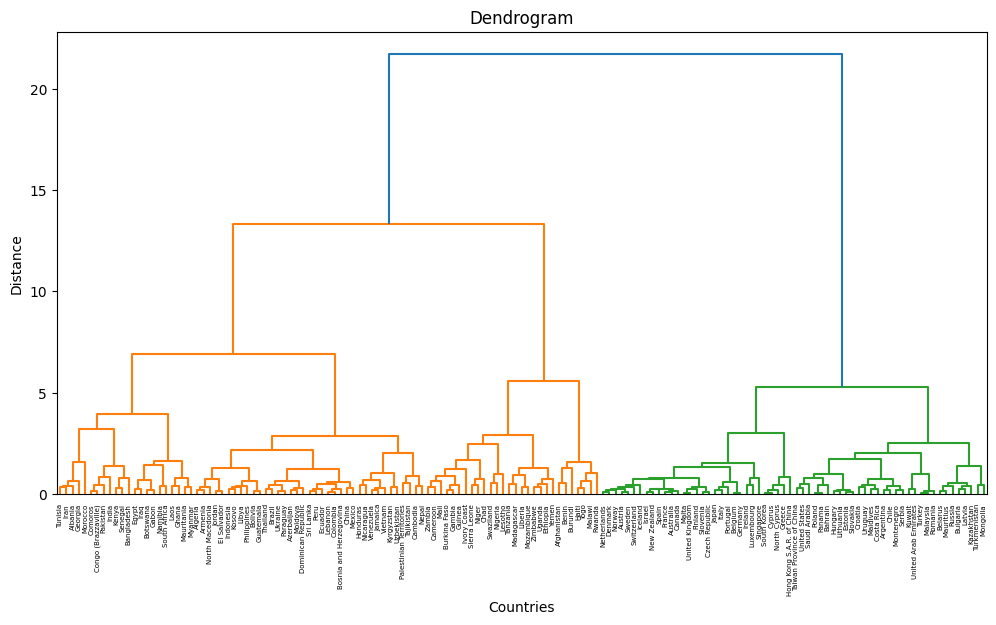

In [60]:
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', labels=df_clean['Country name'].values, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Distance')
plt.show()


In [61]:
from scipy.cluster.hierarchy import fcluster

# Cortar el dendrograma para obtener clusters
max_d = 7  # Ajusta según la visualización del dendrograma
clusters_hierarchical = fcluster(linked, max_d, criterion='distance')

# Añadir resultados al DataFrame
df_clean['Hierarchical Cluster'] = clusters_hierarchical


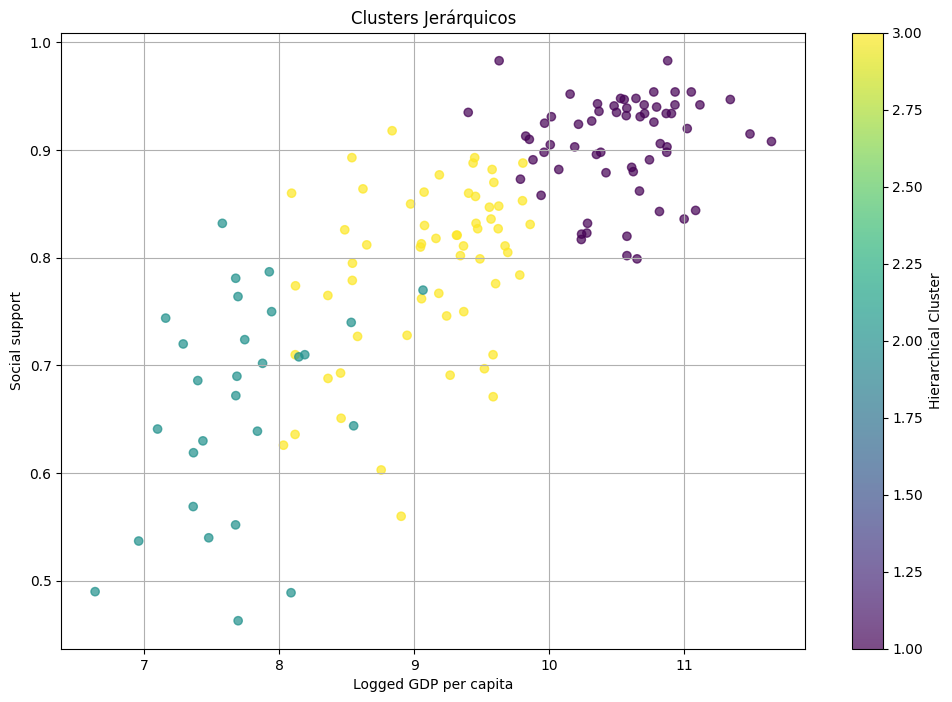

In [62]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_clean['Logged GDP per capita'], df_clean['Social support'],
                      c=df_clean['Hierarchical Cluster'], cmap='viridis', alpha=0.7)

# Añadir una barra de color
plt.colorbar(scatter, label='Hierarchical Cluster')

# Etiquetas y título
plt.title('Clusters Jerárquicos')
plt.xlabel('Logged GDP per capita')
plt.ylabel('Social support')
plt.grid(True)
plt.show()


In [65]:
# Contar el número de países en cada cluster
cluster_counts = df_clean['Hierarchical Cluster'].value_counts()
print(cluster_counts)

# Ver una muestra de datos relevantes
print(df_clean[['Country name', 'Logged GDP per capita', 'Social support', 'Hierarchical Cluster']].head())


Hierarchical Cluster
1    62
3    59
2    28
Name: count, dtype: int64
  Country name  Logged GDP per capita  Social support  Hierarchical Cluster
0      Finland                 10.775           0.954                     1
1      Denmark                 10.933           0.954                     1
2  Switzerland                 11.117           0.942                     1
3      Iceland                 10.878           0.983                     1
4  Netherlands                 10.932           0.942                     1


Al comparar los resultados de los métodos de clustering jerárquico y DBSCAN, se pueden observar patrones interesantes y diferencias clave en la forma en que los países se agrupan según sus niveles de felicidad y bienestar.

Análisis Comparativo de Clusters
DBSCAN:

Distribución de Clusters: Este método identificó un cluster predominante (Cluster 0) con 89 países, que comparten características de alto Logged GDP per capita y Social support. Sin embargo, también identificó un grupo significativo de ruido (Cluster -1), con 49 países que no encajaron en los patrones observados, lo que sugiere características atípicas o condiciones especiales en esos países.
Interpretación del Ruido: La existencia de un número considerable de países en el grupo de ruido indica que algunos países presentan situaciones únicas que merecen un análisis más profundo, ya que pueden tener desafíos específicos que afectan su bienestar.
Clustering Jerárquico:

Distribución de Clusters: A través del clustering jerárquico, se identificaron tres clusters: el más grande (Cluster 1) con 62 países, que refleja una alta felicidad y bienestar; el Cluster 2 con 28 países, que puede representar a naciones en desarrollo; y el Cluster 3 con 59 países, que muestra niveles variables de bienestar.
Foco en Políticas Efectivas: Este enfoque sugiere que los países en el Cluster 1 implementan políticas efectivas que fomentan el bienestar social, mientras que los otros clusters incluyen países que están en diferentes etapas de desarrollo o que enfrentan desafíos más significativos.
Diferencias en los Enfoques
Método de Agrupación: DBSCAN es un método de clustering basado en densidad, que identifica automáticamente el ruido y permite identificar grupos de diferentes formas y tamaños, mientras que el clustering jerárquico se basa en la distancia y la estructura jerárquica, lo que puede resultar en agrupaciones más homogéneas.
Interpretación de Resultados: La interpretación de los clusters en DBSCAN se centra más en la densidad de los datos y la identificación de outliers, mientras que el clustering jerárquico proporciona una estructura clara de los grupos, lo que puede facilitar la identificación de políticas o características comunes.
Conclusión General
Ambos métodos de clustering ofrecen perspectivas valiosas sobre la felicidad y el bienestar a nivel global. La combinación de resultados de ambos enfoques sugiere que, aunque existen patrones claros de bienestar entre los países más desarrollados, también hay una diversidad significativa en las experiencias de felicidad, especialmente en países que no se ajustan a los patrones típicos. Esto destaca la importancia de considerar tanto las políticas efectivas de los países con alto bienestar como los desafíos únicos que enfrentan otros países en su camino hacia la mejora del bienestar. La investigación futura podría centrarse en profundizar en las características de los países clasificados como ruido en DBSCAN y explorar las políticas que están en juego en los clusters intermedios.

In [70]:
# Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Selecciona las características y la variable objetivo
X = df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = df['Ladder score']  # o la variable que estés tratando de predecir

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Optimización de hiperparámetros para Random Forest Regressor
rf_model = RandomForestRegressor()

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

print("Mejores parámetros para Random Forest Regressor: ", rf_grid_search.best_params_)

# 2. Evaluar el modelo optimizado
best_rf_model = rf_grid_search.best_estimator_
rf_predictions = best_rf_model.predict(X_test)

# Calcular MSE y R^2 para Random Forest
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f'Random Forest Regressor - MSE: {rf_mse}, R²: {rf_r2}')

# 3. Para la regresión lineal
lr_model = LinearRegression()

# Ajustar el modelo
lr_model.fit(X_train, y_train)

# Predecir y evaluar
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print(f'Linear Regression - MSE: {lr_mse}, R²: {lr_r2}')



Mejores parámetros para Random Forest Regressor:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Regressor - MSE: 0.36821069784653687, R²: 0.6431439651524244
Linear Regression - MSE: 0.41214786481566734, R²: 0.6005617064653763


Comparación de Modelos:
El Random Forest supera a la regresión lineal en ambos MSE y R², lo que sugiere que es un modelo más adecuado para este conjunto de datos.
La capacidad del Random Forest para manejar relaciones no lineales y su resistencia al sobreajuste pueden explicar su mejor rendimiento en este caso.

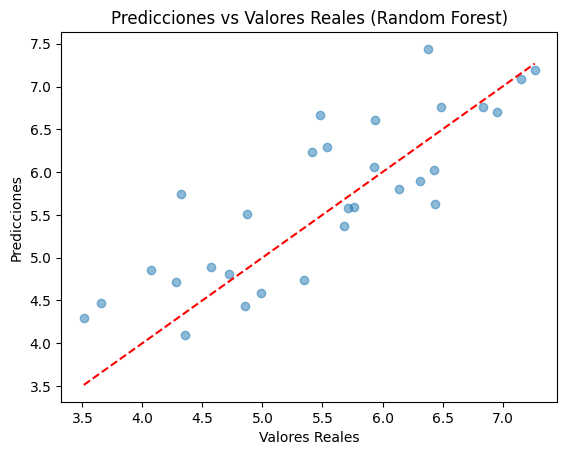

In [71]:
import matplotlib.pyplot as plt

plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (Random Forest)')
plt.show()


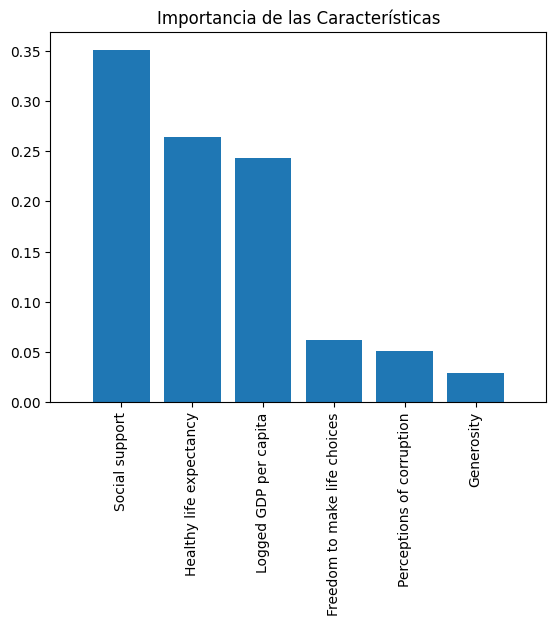

In [72]:
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title('Importancia de las Características')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [75]:
# Importancia de las características
importances = rf_model.feature_importances_

# Crear un DataFrame para mostrar la importancia
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                        Feature  Importance
1                Social support    0.370002
0         Logged GDP per capita    0.344697
2       Healthy life expectancy    0.132280
5     Perceptions of corruption    0.061739
3  Freedom to make life choices    0.058018
4                    Generosity    0.033265


In [74]:
from sklearn.ensemble import RandomForestRegressor

# Ajustar el modelo
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=2)
rf_model.fit(X_train, y_train)  # X_train e y_train son tus datos de entrenamiento


RandomForestRegressor(max_depth=10, n_estimators=50)

Importancia de las Características en Random Forest
Social Support (0.3700):

Este sigue siendo el predictor más importante, lo que refuerza los hallazgos de la regresión lineal. Un fuerte apoyo social es crucial para la felicidad de un país.

Logged GDP per Capita (0.3447):

También mantiene una alta relevancia, similar a la regresión lineal. Este indicador muestra que el nivel de riqueza de un país impacta positivamente la percepción de felicidad.

Healthy Life Expectancy (0.1323):

Aunque sigue siendo importante, su peso es menor en comparación con los dos anteriores. Esto puede indicar que, si bien es relevante, otros factores como el apoyo social y el PIB per cápita tienen un mayor impacto.

Perceptions of Corruption (0.0617):

En Random Forest, esta variable tiene una importancia relativamente baja. Esto podría sugerir que su efecto en la felicidad es mediado por otras variables o que la relación no es lineal.

Freedom to Make Life Choices (0.0580):

Similar a las percepciones de corrupción, esta variable también muestra un peso menor en el modelo de Random Forest. Aunque en la regresión lineal era un predictor fuerte, en este contexto su impacto es menos directo.

Generosity (0.0333):

Esta variable sigue siendo la menos importante en el contexto de Random Forest. Esto refuerza la idea de que, aunque puede tener un efecto positivo, no es un determinante crítico de la felicidad en comparación con otros factores.

Comparación entre Modelos
Robustez del Modelo: Random Forest parece ofrecer una imagen más matizada al capturar interacciones complejas entre las variables. Aunque la regresión lineal identifica claramente la importancia de algunas variables, puede no captar todas las complejidades que Random Forest puede modelar.

Predicción Efectiva: Dada la importancia de "Social support" y "Logged GDP per capita" en ambos modelos, podemos concluir que estas variables son fundamentales para predecir la felicidad. Sin embargo, el Random Forest sugiere que otras variables como "Healthy life expectancy" pueden tener un papel menos central, lo que implica que hay interacciones más complejas en juego.

Implicaciones
Desarrollo de Políticas: Los hallazgos sugieren que las políticas enfocadas en mejorar el apoyo social y la economía (PIB per cápita) podrían tener un impacto significativo en el bienestar general de la población.

Consideración de Interacciones: La diferencia en la importancia de las variables entre los modelos resalta la necesidad de considerar no solo los efectos directos de las variables, sino también cómo interactúan entre sí.

Conclusión Final
Ambos modelos proporcionan información valiosa sobre la felicidad en los países. Mientras que la regresión lineal ofrece una visión clara de las relaciones entre las variables, Random Forest profundiza en las complejidades y las interacciones, sugiriendo que un enfoque combinado puede ser el más efectivo para entender y mejorar el bienestar. Las políticas públicas deben centrarse en fortalecer el apoyo social y la economía, teniendo en cuenta que otros factores pueden influir en la felicidad de maneras más complejas.